# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
from sklearn.datasets import fetch_mldata
import seaborn as sns

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
X = mnist['data']
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.reshape(70000,1)

In [7]:
y.shape

(70000, 1)

**Let us analyze the data by converting the data into data frames**


In [8]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

Analyzing input data: Input data has 784 features representing 28*28 pixel of each datapoint.
There are about 7000 such datapoints meaning 7000 images. Each feature has values from 0 to 255, 0 representing white & 255 representing black

In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Analyzing labels: output labels has 7000 datapoints each having vales from 0 to 9 representing digits.

In [11]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
0    70000 non-null float64
dtypes: float64(1)
memory usage: 547.0 KB


In [12]:
y_df.describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


** Getting data from yann lecunn dataset** 

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [13]:
import idx2numpy

**Extract Training data**

In [14]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [15]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape

(60000,)

**Extract Test data**

In [19]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [20]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
X_test.shape

(10000, 784)

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
y_test.shape

(10000,)

**Function to display a digit image from one 1-d representation of pixels**

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

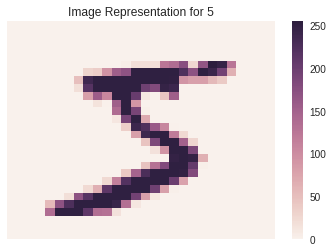

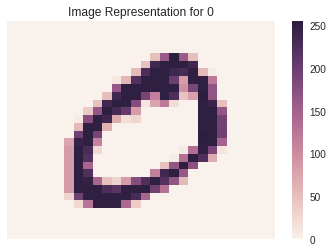

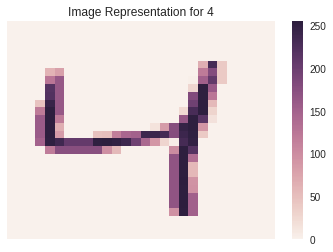

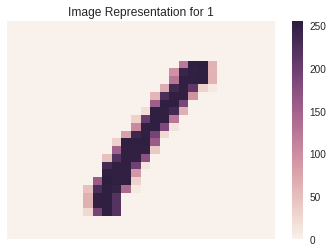

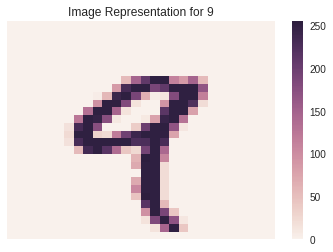

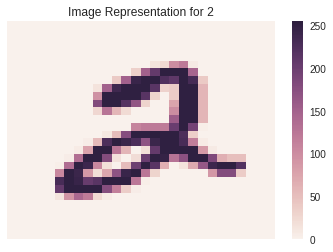

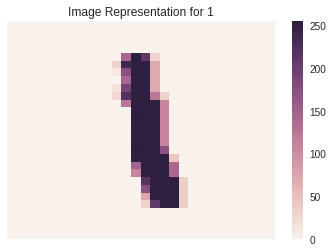

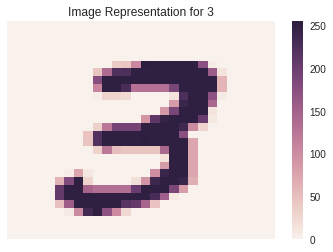

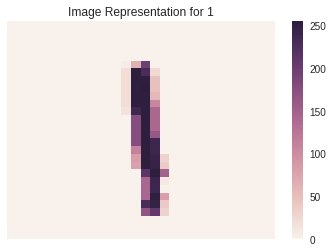

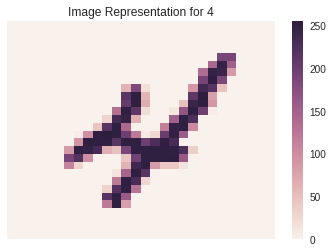

In [25]:
for i in range(10):
    display(X_train[i],y_train[i])

** Select a linear model(Logistic regression) & evaluate the performance of the model using cross validation**

In [26]:
import tensorflow
import keras
import numpy as np
import pandas as pd

from keras.models import Sequential#initialize ann
from keras.layers import Dense#add diff layers in ann


Using TensorFlow backend.


** Normalize the input set to be between 0 to 1 **

In [28]:
X_train_norm = X_train/255
X_test_norm = X_test/255
X_test_norm

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

**Use One hot encoding for the y to convert it to a binary matrix** 

In [29]:
from keras.utils import np_utils
y_train_norm = np_utils.to_categorical(y_train)
y_test_norm = np_utils.to_categorical(y_test)

**Initialize Neural Network**

In [30]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [31]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [32]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [33]:
classifier.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = classifier.fit(X_train_norm,y_train_norm,batch_size=250,epochs=10,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 25s 590us/step - loss: 0.4722 - acc: 0.8785 - val_loss: 0.2489 - val_acc: 0.9302
Epoch 2/10
42000/42000 [==============================] - 25s 590us/step - loss: 0.2052 - acc: 0.9417 - val_loss: 0.1803 - val_acc: 0.9478
Epoch 3/10
42000/42000 [==============================] - 25s 605us/step - loss: 0.1462 - acc: 0.9585 - val_loss: 0.1527 - val_acc: 0.9571
Epoch 4/10
42000/42000 [==============================] - 23s 558us/step - loss: 0.1122 - acc: 0.9679 - val_loss: 0.1312 - val_acc: 0.9624
Epoch 5/10
42000/42000 [==============================] - 24s 573us/step - loss: 0.0905 - acc: 0.9737 - val_loss: 0.1150 - val_acc: 0.9662
Epoch 6/10
 9250/42000 [=====>........................] - ETA: 16s - loss: 0.0723 - acc: 0.9805

In [26]:
training_accuracy = hist.history["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
cross_val_loss = hist.history["val_loss"]

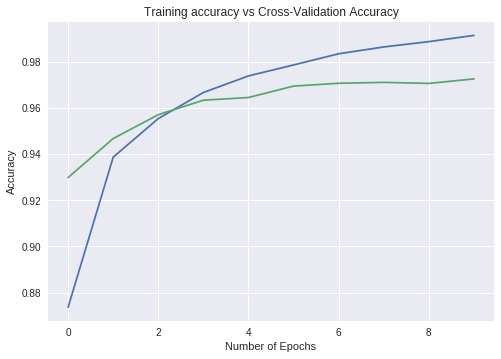

In [24]:
sns.set(style="darkgrid")
x_epoch = range(10)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")

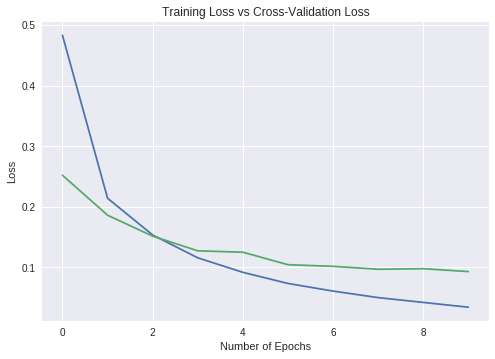

In [27]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")

In [31]:
test_loss, test_accuracy= classifier.evaluate(X_test,y_test,batch_size=100)
loss

10000/10000 [==============================] - 3s 264us/step


0.078098089245031588

In [49]:
y_test_pred = classifier.predict(X_test)
y_test_pred = list(map(lambda i: np.argmax(i),y_test_pred))
y_test_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


**Plot Confusion Matrix against Test data**

In [53]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 966,    0,    0,    3,    1,    2,    6,    1,    1,    0],
       [   0, 1125,    4,    0,    0,    1,    2,    0,    3,    0],
       [   3,    1, 1010,    4,    1,    0,    2,    6,    5,    0],
       [   0,    0,    0,  997,    0,    3,    0,    4,    4,    2],
       [   0,    0,    2,    1,  960,    0,    7,    3,    2,    7],
       [   2,    0,    0,    6,    1,  868,    6,    2,    5,    2],
       [   2,    3,    2,    1,    2,    3,  942,    0,    3,    0],
       [   0,    7,    8,    5,    0,    0,    0, 1005,    0,    3],
       [   3,    0,    3,   10,    4,    4,    3,    4,  942,    1],
       [   3,    6,    1,   12,   10,    4,    1,   11,    5,  956]])

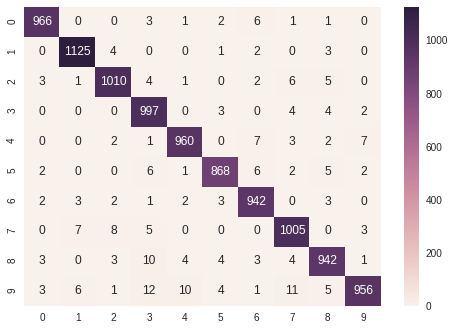

In [54]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [55]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

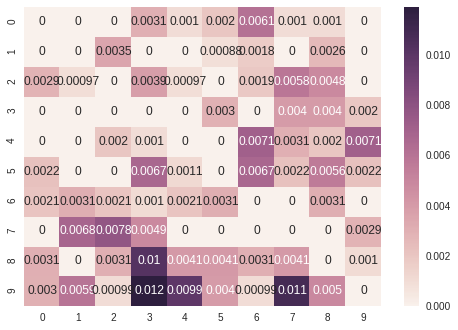

In [56]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.97709999999999997

**Evaluating the performance on for 200 Epochs**

In [43]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [30]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [31]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [32]:
classifier.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = classifier.fit(X_train,y_train,batch_size=10,epochs=200,verbose=1, validation_split=0.3)

In [ ]:
training_accuracy = hist.hostory["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
coss_val_loss = hist.history["val_loss"]

In [ ]:
sns.set(style="darkgrid")
x_epoch = range(200)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")

In [ ]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")

In [22]:
y_test_pred = classifier.predict(X_test)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

**Plot Confusion Matrix against Test data**

In [38]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 961,    0,    1,    1,    0,    0,   10,    2,    5,    0],
       [   0, 1106,    2,    3,    1,    1,    4,    2,   16,    0],
       [   9,   12,  902,   16,   11,    1,   13,   17,   46,    5],
       [   3,    1,   21,  916,    1,   22,    4,   10,   24,    8],
       [   1,    4,    6,    1,  904,    1,    8,    1,   10,   46],
       [  16,    6,    4,   48,   16,  695,   25,   13,   58,   11],
       [   9,    3,    4,    1,   10,    9,  913,    2,    7,    0],
       [   2,   17,   20,    5,    9,    2,    1,  936,    4,   32],
       [  14,   18,    6,   24,   13,   30,   11,   15,  831,   12],
       [  11,    8,    3,   14,   49,   14,    0,   31,   11,  868]])

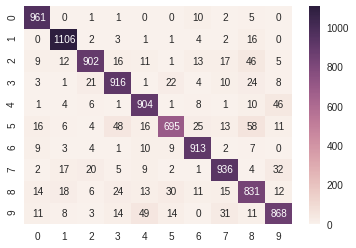

In [39]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [40]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

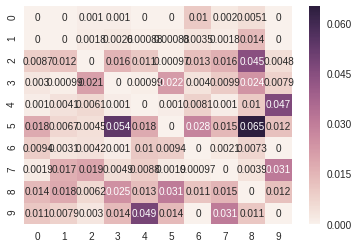

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9032

##### **Evaluating the performance on for 500 Epochs**

In [43]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [30]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [31]:
#Adding output layer
classifier.add(Dense(activation="softmax",units=10,kernel_initializer="uniform"))


In [32]:
classifier.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = classifier.fit(X_train,y_train,batch_size=10,epochs=500,verbose=1, validation_split=0.3)

In [ ]:
training_accuracy = hist.hostory["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
coss_val_loss = hist.history["val_loss"]

In [ ]:
sns.set(style="darkgrid")
x_epoch = range(500)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")

In [ ]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")

In [22]:
y_test_pred = classifier.predict(X_test)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

**Plot Confusion Matrix against Test data**

In [38]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 961,    0,    1,    1,    0,    0,   10,    2,    5,    0],
       [   0, 1106,    2,    3,    1,    1,    4,    2,   16,    0],
       [   9,   12,  902,   16,   11,    1,   13,   17,   46,    5],
       [   3,    1,   21,  916,    1,   22,    4,   10,   24,    8],
       [   1,    4,    6,    1,  904,    1,    8,    1,   10,   46],
       [  16,    6,    4,   48,   16,  695,   25,   13,   58,   11],
       [   9,    3,    4,    1,   10,    9,  913,    2,    7,    0],
       [   2,   17,   20,    5,    9,    2,    1,  936,    4,   32],
       [  14,   18,    6,   24,   13,   30,   11,   15,  831,   12],
       [  11,    8,    3,   14,   49,   14,    0,   31,   11,  868]])

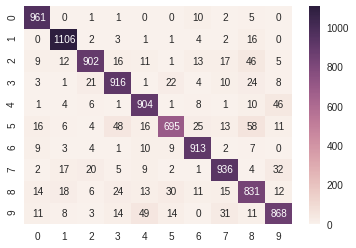

In [39]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [40]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

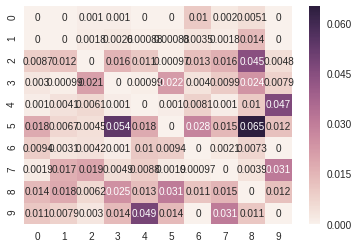

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9032

##### **Evaluating the performance on for sigmoid output activation function**

In [43]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [30]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [31]:
#Adding output layer
classifier.add(Dense(activation="sigmoid",units=10,kernel_initializer="uniform"))


In [32]:
classifier.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = classifier.fit(X_train,y_train,batch_size=10,epochs=250,verbose=1, validation_split=0.3)

In [ ]:
training_accuracy = hist.hostory["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
coss_val_loss = hist.history["val_loss"]

In [ ]:
sns.set(style="darkgrid")
x_epoch = range(500)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")

In [ ]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")

In [22]:
y_test_pred = classifier.predict(X_test)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

**Plot Confusion Matrix against Test data**

In [38]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 961,    0,    1,    1,    0,    0,   10,    2,    5,    0],
       [   0, 1106,    2,    3,    1,    1,    4,    2,   16,    0],
       [   9,   12,  902,   16,   11,    1,   13,   17,   46,    5],
       [   3,    1,   21,  916,    1,   22,    4,   10,   24,    8],
       [   1,    4,    6,    1,  904,    1,    8,    1,   10,   46],
       [  16,    6,    4,   48,   16,  695,   25,   13,   58,   11],
       [   9,    3,    4,    1,   10,    9,  913,    2,    7,    0],
       [   2,   17,   20,    5,    9,    2,    1,  936,    4,   32],
       [  14,   18,    6,   24,   13,   30,   11,   15,  831,   12],
       [  11,    8,    3,   14,   49,   14,    0,   31,   11,  868]])

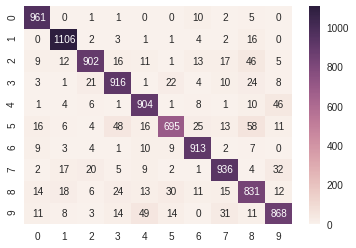

In [39]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [40]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

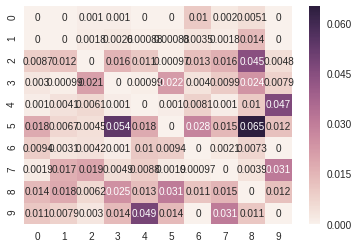

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9032

##### **Evaluating the performance on for tanh output activation function**

In [43]:
classifier = Sequential()

**Add input layer & Hidden layer **


In [30]:
#classifier.add(Dense(output_dim=397,init='uniform',activation='relu',input_dim=784))
classifier.add(Dense(activation="relu",input_dim=784,units=397,kernel_initializer="uniform"))
#number of nodes in the hidden layer = avg(INNPUTLAYER + OUTPUTLAYER)
#classifier.add(Dense(activation="relu",units=397,kernel_initializer="uniform"))


In [31]:
#Adding output layer
classifier.add(Dense(activation="tanh",units=10,kernel_initializer="uniform"))


In [32]:
classifier.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = classifier.fit(X_train,y_train,batch_size=10,epochs=250,verbose=1, validation_split=0.3)

In [ ]:
training_accuracy = hist.hostory["acc"]
training_loss = hist.history["loss"]
cross_val_accuracy = hist.history["val_acc"]
coss_val_loss = hist.history["val_loss"]

In [ ]:
sns.set(style="darkgrid")
x_epoch = range(500)
plt.plot(x_epoch,training_accuracy)
plt.plot(x_epoch,cross_val_accuracy)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy vs Cross-Validation Accuracy")

In [ ]:
plt.plot(x_epoch,training_loss)
plt.plot(x_epoch,cross_val_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Cross-Validation Loss")

In [22]:
y_test_pred = classifier.predict(X_test)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

**Plot Confusion Matrix against Test data**

In [38]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 961,    0,    1,    1,    0,    0,   10,    2,    5,    0],
       [   0, 1106,    2,    3,    1,    1,    4,    2,   16,    0],
       [   9,   12,  902,   16,   11,    1,   13,   17,   46,    5],
       [   3,    1,   21,  916,    1,   22,    4,   10,   24,    8],
       [   1,    4,    6,    1,  904,    1,    8,    1,   10,   46],
       [  16,    6,    4,   48,   16,  695,   25,   13,   58,   11],
       [   9,    3,    4,    1,   10,    9,  913,    2,    7,    0],
       [   2,   17,   20,    5,    9,    2,    1,  936,    4,   32],
       [  14,   18,    6,   24,   13,   30,   11,   15,  831,   12],
       [  11,    8,    3,   14,   49,   14,    0,   31,   11,  868]])

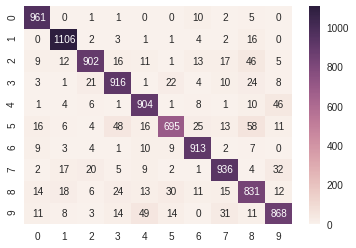

In [39]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [40]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

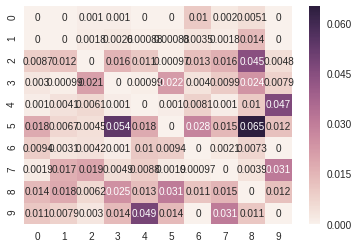

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9032